In [48]:
from pycaret.datasets import get_data
import joblib as jb
import pandas as pd

In [49]:
df = pd.DataFrame(jb.load('01AEDAdataV1.bin'))

In [50]:
df = df.dropna()
df.shape

(56935, 83)

In [51]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (54088, 83)
Unseen Data For Predictions: (2847, 83)


_______________________________

In [52]:
from pycaret.classification import *

In [53]:
exp_clf101 = setup(data = data, target = 'hospital_death')

,Description,Value
0,Session id,6963
1,Target,hospital_death
2,Target type,Binary
3,Original data shape,"(54088, 83)"
4,Transformed data shape,"(54088, 120)"
5,Transformed train set shape,"(37861, 120)"
6,Transformed test set shape,"(16227, 120)"
7,Numeric features,61
8,Categorical features,7
9,Preprocess,True


In [54]:
best_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


In [55]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6963, verbose=0,
                     warm_start=False)


In [56]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [57]:
dt = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9261,0.0000,0.2043,0.7791,0.3237,0.2984,0.3753
1,0.9208,0.0000,0.1616,0.6795,0.2611,0.2356,0.3057
2,0.9253,0.0000,0.1927,0.7683,0.3081,0.2832,0.3612
3,0.9245,0.0000,0.2141,0.7071,0.3286,0.3006,0.3621
4,0.9221,0.0000,0.1590,0.7222,0.2607,0.2369,0.3152
5,0.9205,0.0000,0.1529,0.6757,0.2494,0.2247,0.2962
6,0.9229,0.0000,0.1651,0.7397,0.2700,0.2462,0.3261
7,0.9263,0.0000,0.1988,0.7927,0.3178,0.2934,0.3741
8,0.9260,0.0000,0.1988,0.7831,0.3171,0.2923,0.3713


In [58]:
print(dt)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6963, verbose=0,
                     warm_start=False)


In [59]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9213,0.0000,0.1677,0.6875,0.2696,0.2439,0.3138
1,0.9213,0.0000,0.1890,0.6596,0.2938,0.2655,0.3250
2,0.9258,0.0000,0.2018,0.7674,0.3196,0.2942,0.3696
3,0.9245,0.0000,0.2202,0.6990,0.3349,0.3062,0.3647
4,0.9192,0.0000,0.1560,0.6296,0.2500,0.2234,0.2859
5,0.9194,0.0000,0.1835,0.6122,0.2824,0.2526,0.3052
6,0.9234,0.0000,0.1743,0.7403,0.2822,0.2577,0.3354
7,0.9247,0.0000,0.2049,0.7283,0.3198,0.2930,0.3606
8,0.9221,0.0000,0.1865,0.6778,0.2926,0.2652,0.3285


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
print(dt)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6963, verbose=0,
                     warm_start=False)


In [61]:
print(tuned_dt)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6963, verbose=0,
                     warm_start=False)


_________________

#### AUC Plot

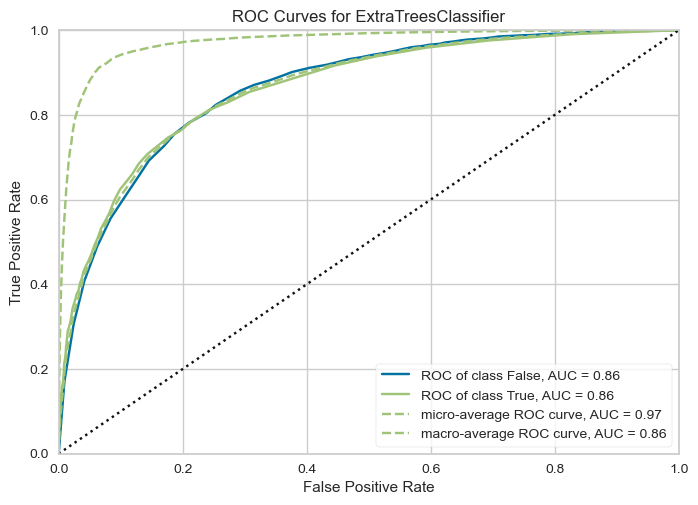

In [62]:
plot_model(tuned_dt, plot = 'auc')

#### Precision-Recall Curve

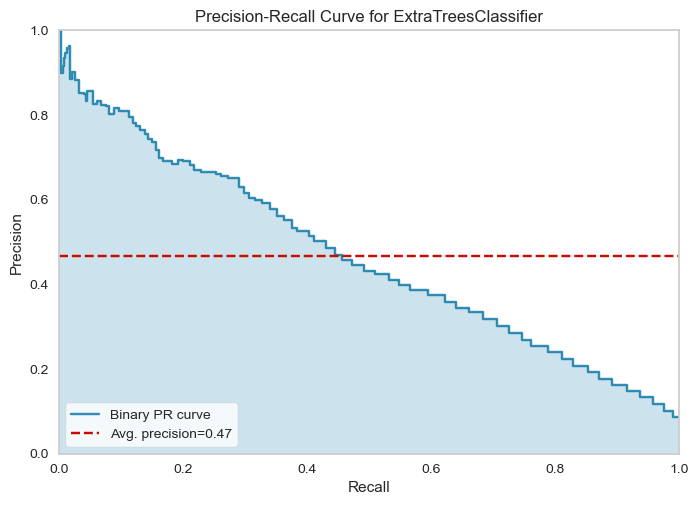

In [63]:
plot_model(tuned_dt, plot = 'pr')

#### Feature Importance Plot

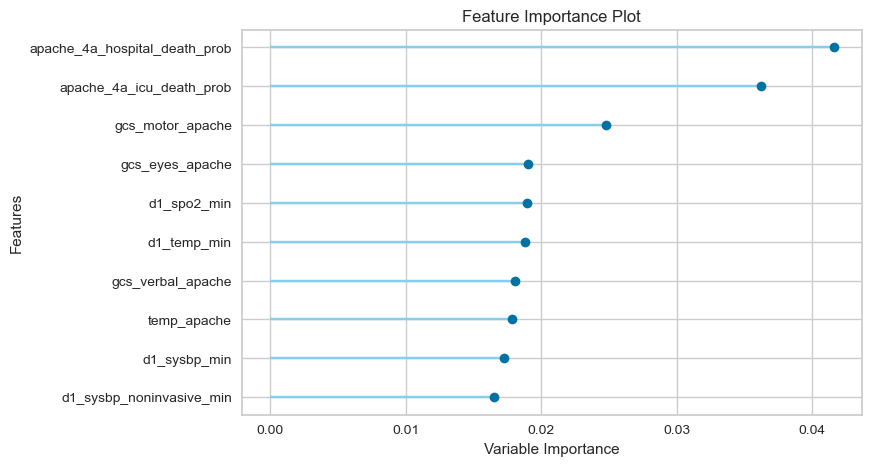

In [64]:
plot_model(tuned_dt, plot='feature')

#### Confusion Matrix

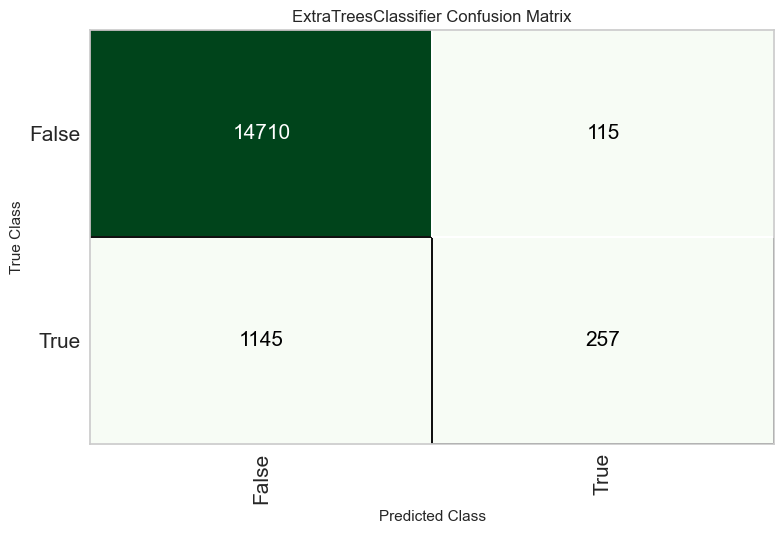

In [65]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [66]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict on test

In [67]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9224,0.8636,0.1833,0.6909,0.2897,0.2630,0.3296


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
13775,66259,125,40,20.919012,False,Other/Unknown,F,142.2,Accident & Emergency,696,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.99
16115,16241,157,67,42.093839,False,Caucasian,F,154.9,Accident & Emergency,678,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.97
20418,57840,194,69,42.421875,False,African American,F,160.0,Accident & Emergency,601,...,False,False,False,False,False,Hematological,Haematologic,False,0,0.98
17522,49408,74,64,24.969136,False,Caucasian,M,180.0,Operating Room / Recovery,144,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,1.00
49200,67145,186,68,23.136338,False,African American,F,168.0,Accident & Emergency,498,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45681,4260,27,63,32.595156,False,Caucasian,M,170.0,Accident & Emergency,608,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.98
34467,39413,101,82,27.403422,True,Caucasian,M,177.8,Operating Room / Recovery,613,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.97
251,59386,132,34,22.534014,False,Caucasian,F,168.0,Accident & Emergency,499,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.00
22410,86712,158,87,17.092467,False,Caucasian,F,157.5,Floor,836,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.95


### Finalize Model

In [68]:
final_dt = finalize_model(tuned_dt)

In [69]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['encounter_id', 'hospital_id',
                                             'age', 'bmi', 'height', 'icu_id',
                                             'pre_icu_los_days', 'weight',
                                             'apache_2_diagnosis',
                                             'apache_3j_diagnosis',
                                             'gcs_eyes_apache',
                                             'gcs_motor_apache',
                                             'gcs_verbal_apache',
                                             'heart_rate_apache', 'map_apache',
                                             'resprate_apache', 'temp...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
               

In [70]:
predict_model(final_dt)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
13775,66259,125,40,20.919012,False,Other/Unknown,F,142.2,Accident & Emergency,696,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0
16115,16241,157,67,42.093839,False,Caucasian,F,154.9,Accident & Emergency,678,...,False,False,False,False,False,Respiratory,Respiratory,False,0,1.0
20418,57840,194,69,42.421875,False,African American,F,160.0,Accident & Emergency,601,...,False,False,False,False,False,Hematological,Haematologic,False,0,1.0
17522,49408,74,64,24.969136,False,Caucasian,M,180.0,Operating Room / Recovery,144,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,1.0
49200,67145,186,68,23.136338,False,African American,F,168.0,Accident & Emergency,498,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45681,4260,27,63,32.595156,False,Caucasian,M,170.0,Accident & Emergency,608,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0
34467,39413,101,82,27.403422,True,Caucasian,M,177.8,Operating Room / Recovery,613,...,False,False,False,False,False,Respiratory,Respiratory,False,0,1.0
251,59386,132,34,22.534014,False,Caucasian,F,168.0,Accident & Emergency,499,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0
22410,86712,158,87,17.092467,False,Caucasian,F,157.5,Floor,836,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0


In [71]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9336,0.8956,0.2074,0.7258,0.3226,0.2988,0.3653


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
0,48056,118,65,28.408929,False,Hispanic,M,167.6,Accident & Emergency,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.98
1,129675,77,76,32.374349,False,Caucasian,M,182.9,Floor,113,...,False,True,False,False,False,Cardiovascular,Cardiovascular,False,0,0.96
2,52821,118,25,46.40625,True,Caucasian,F,160.0,Operating Room / Recovery,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.99
3,42646,118,33,24.386111,False,Caucasian,F,167.6,Floor,89,...,False,False,False,False,True,Neurological,Neurologic,False,0,0.94
4,60738,118,84,29.186193,False,Caucasian,F,157.5,Floor,92,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.91


### Predict on unseen data

In [72]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Precision')

0.7258

### Saving/Loading Model

In [73]:
save_model(final_dt,'./FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['encounter_id', 'hospital_id',
                                              'age', 'bmi', 'height', 'icu_id',
                                              'pre_icu_los_days', 'weight',
                                              'apache_2_diagnosis',
                                              'apache_3j_diagnosis',
                                              'gcs_eyes_apache',
                                              'gcs_motor_apache',
                                              'gcs_verbal_apache',
                                              'heart_rate_apache', 'map_apache',
                                              'resprate_apache', 'temp...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',


______________________________

In [74]:
from pycaret.classification import *

In [75]:
saved_final_rf = load_model('./FinalModel')

Transformation Pipeline and Model Successfully Loaded


In [76]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9336,0.8956,0.2074,0.7258,0.3226,0.2988,0.3653


In [77]:
new_prediction['prediction_label']

0       0
1       0
2       0
3       0
4       0
       ..
2842    0
2843    0
2844    0
2845    0
2846    0
Name: prediction_label, Length: 2847, dtype: int32

In [78]:
new_prediction['prediction_score']

0       0.98
1       0.96
2       0.99
3       0.94
4       0.91
        ... 
2842    0.97
2843    1.00
2844    0.89
2845    0.97
2846    0.88
Name: prediction_score, Length: 2847, dtype: float64

________________________________

In [79]:
new_prediction.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
0,48056,118,65,28.408929,False,Hispanic,M,167.6,Accident & Emergency,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.98
1,129675,77,76,32.374349,False,Caucasian,M,182.9,Floor,113,...,False,True,False,False,False,Cardiovascular,Cardiovascular,False,0,0.96
2,52821,118,25,46.40625,True,Caucasian,F,160.0,Operating Room / Recovery,100,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.99
3,42646,118,33,24.386111,False,Caucasian,F,167.6,Floor,89,...,False,False,False,False,True,Neurological,Neurologic,False,0,0.94
4,60738,118,84,29.186193,False,Caucasian,F,157.5,Floor,92,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.91


#### results of unseen_predictions and new_prediction are identical

In [80]:
from pycaret.utils.generic import check_metric
check_metric(new_prediction['hospital_death'], new_prediction['prediction_label'], metric = 'Precision')

0.7258

__________________________

________________________